# Credit Card Scam Analytics - Aprajita Sharma

## Data frames

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('/content/creditcard.csv')

In [12]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116937,74484,-0.934006,-1.503903,1.058895,-2.361391,-2.028143,-0.363832,0.952631,-0.051021,-0.210507,...,0.030498,-0.010490,0.865103,0.481051,-0.389144,-0.149430,0.050944,0.184436,377.73,0.0
116938,74484,-3.127918,0.405786,1.898121,0.494119,-1.374594,1.513014,-0.335495,0.243147,1.332244,...,-0.970703,-0.397175,-0.439562,-0.326466,0.694057,-0.111650,0.391746,0.301610,100.00,0.0
116939,74484,1.195331,-0.166388,-1.623243,-0.588598,2.262196,3.029452,-0.062796,0.659896,-0.320458,...,-0.392730,-1.489906,0.046603,0.993453,0.416458,0.145904,-0.075984,0.015540,80.90,0.0
116940,74484,1.085605,-0.145635,1.077927,1.638285,-0.472635,0.828304,-0.474942,0.260914,1.157265,...,-0.423978,-0.727626,0.021664,-0.256942,0.496296,-0.491121,0.093949,0.028586,21.02,0.0


In [13]:
df['Class'].value_counts()

,count
Class,
0.0,116697
1.0,244


### Data Pre-processing

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scalar = StandardScaler()

In [23]:
df.dropna(inplace=True)

In [24]:
X = df.drop('Class', axis=1)
y = df.Class

In [25]:
X = scalar.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Modeling

In [27]:
from sklearn.svm import SVC

In [28]:
model_svc = SVC()

In [29]:
model_svc.fit(X_train, y_train)

SVC()

In [30]:
model_svc.score(X_train,y_train)

0.9996258765178724

In [31]:
model_svc.score(X_test,y_test)

0.9995296934456368

In [32]:
y_predict = model_svc.predict(X_test)

## Implementing Report

In [33]:
from sklearn.metrics import classification_report , confusion_matrix

In [34]:
import numpy as np

In [35]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is Fraud', 'is Normal'],columns=['predicted fraud','predicted normal'])
confusion

,predicted fraud,predicted normal
is Fraud,32,11
is Normal,0,23346


In [36]:
import seaborn as sns

<Axes: >

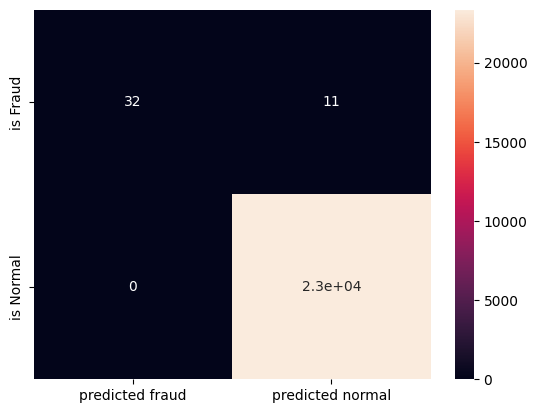

In [37]:
sns.heatmap(confusion, annot=True)

In [38]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     23346
         1.0       1.00      0.74      0.85        43

    accuracy                           1.00     23389
   macro avg       1.00      0.87      0.93     23389
weighted avg       1.00      1.00      1.00     23389

